# Setup & Imports

In [1]:
%autoawait asyncio

from heuristic import *
from rpc_utils import *
from analyze import analyze

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Perform Experiments

In [2]:
max_eta = 5
max_block_height = 1765857 # 2 years after block height 1240503
mixin_dict, time_dict, keys_to_analyze = await analyze(5, max_block_height)
print(len(keys_to_analyze))

Done with async RPC, found 26522259 different outputs
0.5937267259172757
0.6142106899717705
0.6170250052983798
0.6175059975094882
0.617587777873672
26522259


# Plot Results

255
255


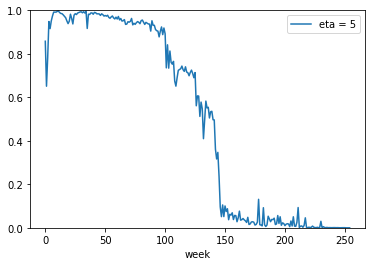

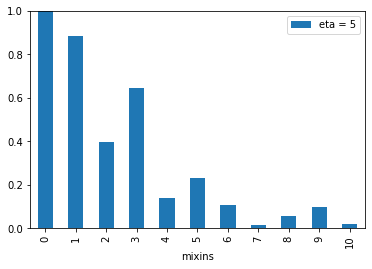

In [5]:
print(len(time_dict["week"]))
print(len(time_dict["eta = 1"]))
dft = pd.DataFrame(time_dict)
dfm = pd.DataFrame(mixin_dict)

dft.plot(x="week", y=["eta = 5"], ylim=(0,1))
plt.show()

dfm10 = dfm[dfm["mixins"] <= 10]
dfm10.plot(x="mixins", y=["eta = 5"], kind="bar", ylim=(0,1))
plt.show()

# Assignment 2: Research question 1

In [11]:
# Determine traceability in last two weeks
total_last_2, traceable_last_2 = 0, 0
# unix timestamp of 24-01-2019 00:00:00 two weeks prior to last transaction
timestamp_start_last_2 = 1548288000
for input in keys_to_analyze:
    # Filter last inputs from last two weeks
    if input.block_timestamp >= timestamp_start_last_2:
        total_last_2 += 1
        if len(input.keys) == 1:
            traceable_last_2 += 1

print("Percentage of traceable inputs in last 2 weeks = {}".format(traceable_last_2 / total_last_2))

Percentage of traceable inputs in last 2 weeks = 0.0006204778731280498


# Assignment 2: Research question 2 (Plot)

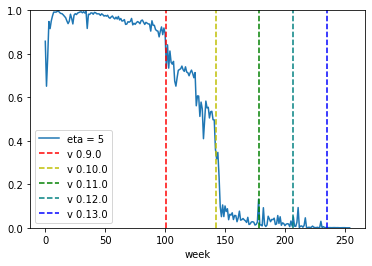

In [25]:
# unix timestamps of enforcing version 0.9.0 up until 0.13.0
version_timestamps = [1458691200, 1484006400, 1505433600, 1522886400, 1539820800]
version_week = [t / 604800 - 2311 for t in version_timestamps]
colors = ['r', 'y', 'g', 'teal', 'b']


dft.plot(x="week", y=["eta = 5"], ylim=(0,1))
version = 9
for week, c in zip(version_week, colors):
    plt.axvline(x=week, ymin=0, ymax=1, ls='--', c=c, label="v 0.{}.0".format(version))
    version += 1
plt.legend()
plt.savefig('plots/traceable_versions.pdf')
plt.show()

# Assignment 2: Research question 2 (traceability per version)

In [29]:
total_segment = [0, 0, 0, 0, 0, 0]
traceable_segment = [0, 0, 0, 0, 0, 0]
for input in keys_to_analyze:
    for i, t in enumerate(version_timestamps):
        if input.block_timestamp < t:
            total_segment[i] += 1
            traceable_segment[i] += 1 if len(input.keys) == 1 else 0
            break
    else:
        total_segment[5] += 1
        traceable_segment[5] += 1 if len(input.keys) == 1 else 0

percentage_segment = [np.float64(i) / j for i, j in zip(traceable_segment, total_segment)]
percentage_segment


[0.9665400696777076,
 0.6198565851645961,
 0.070736412923685,
 0.032440659652719576,
 0.013802148047952866,
 0.0006277839686384302]